#Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

## metrics
from sklearn.metrics import silhouette_score

#Dataset

In [2]:
cancer_data = load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Shape of Dataset

In [26]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  569
Number of columns:  30


# Scaling of Dataset

In [7]:
# Feature Scaling

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
df_scaled = pd.DataFrame(df_scaled, columns=cancer_data['feature_names'])

In [9]:
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#Clustring Dataset with K-Means

In [30]:
# WCSS: Within-Cluster Sum of Squares

wcss = []

silhoutte_scores = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_scaled)

  # wcss append
  wcss.append(kmeans.inertia_)

  # silhoutte score append
  score = silhouette_score(df_scaled, kmeans.labels_)
  silhoutte_scores.append(score)


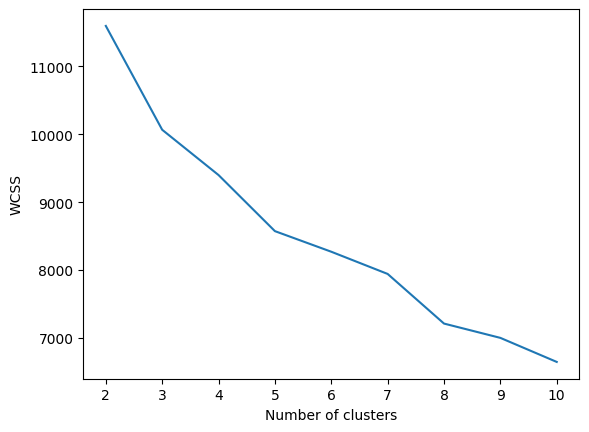

In [12]:
# elbow method

plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Number of elbows coulbe be - 3, 5, 7 & 8

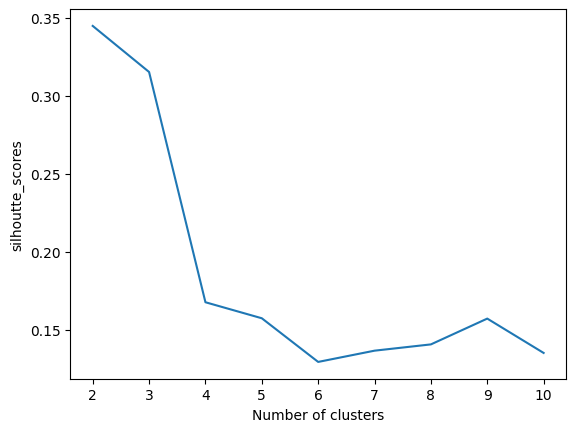

In [13]:
# silhoutte plot

plt.plot(range(2, 11), silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('silhoutte_scores')
plt.show()

In [28]:
# Final Decision: optimal number of cluster is 3 with highest shilhoute score among all elbows

# Preparing PCA model

In [43]:
# Iterate over 20 different PCA models with varying numbers of components

explained_variances = []

for n_components in range(1, 21):
    pca = PCA(n_components=n_components)
    pca.fit(df_scaled)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    print(f'Number of components: {n_components}, Explained Variance: {explained_variance:.4f}')


Number of components: 1, Explained Variance: 0.4427
Number of components: 2, Explained Variance: 0.6324
Number of components: 3, Explained Variance: 0.7264
Number of components: 4, Explained Variance: 0.7924
Number of components: 5, Explained Variance: 0.8473
Number of components: 6, Explained Variance: 0.8876
Number of components: 7, Explained Variance: 0.9101
Number of components: 8, Explained Variance: 0.9260
Number of components: 9, Explained Variance: 0.9399
Number of components: 10, Explained Variance: 0.9516
Number of components: 11, Explained Variance: 0.9614
Number of components: 12, Explained Variance: 0.9701
Number of components: 13, Explained Variance: 0.9781
Number of components: 14, Explained Variance: 0.9834
Number of components: 15, Explained Variance: 0.9865
Number of components: 16, Explained Variance: 0.9892
Number of components: 17, Explained Variance: 0.9911
Number of components: 18, Explained Variance: 0.9929
Number of components: 19, Explained Variance: 0.9945
Nu

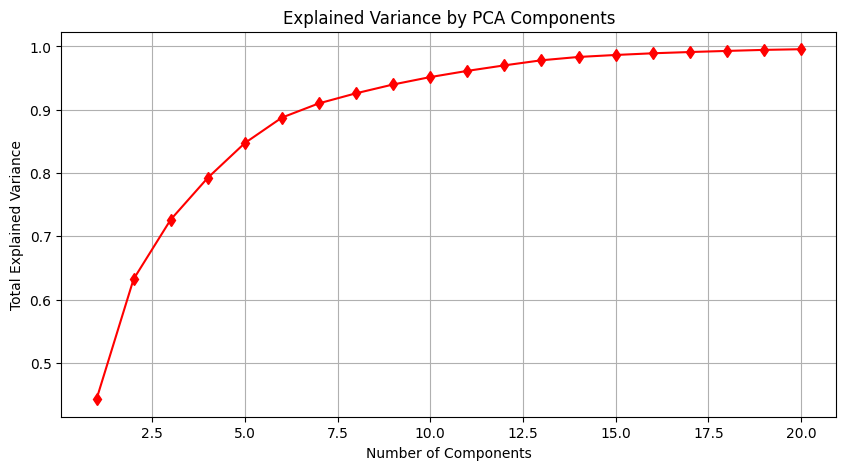

Optimal number of components: 20


In [46]:
# Plot the explained variances for each PCA model

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), explained_variances, marker='d', color = 'red')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Find the optimal number of components based on the highest explained variance

optimal_components = np.argmax(explained_variances) + 1
print(f'Optimal number of components: {optimal_components}')


In [40]:
# Showing saturation from 7 columns

In [41]:
pca = PCA(n_components = 7)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [42]:
df_pca

,0,1,2,3,4,5,6
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082
